# Mechine Leaning Homework 1

In [15]:
!pip install numpy scipy pandas matplotlib scikit-learn statsmodels > /dev/null

In [16]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import statsmodels.api as sm

In [17]:
data = pd.read_csv('top_1000_sites.tsv', sep='\t')
print(f'{len(data.columns)} columns')
data.head()

9 columns


,Rank,Site,Category,UniqueVisitors,Reach,PageViews,HasAdvertising,InEnglish,TLD
0,1,facebook.com,Social Networks,880000000,47.2,910000000000,Yes,Yes,com
1,2,youtube.com,Online Video,800000000,42.7,100000000000,Yes,Yes,com
2,3,yahoo.com,Web Portals,660000000,35.3,77000000000,Yes,Yes,com
3,4,live.com,Search Engines,550000000,29.3,36000000000,Yes,Yes,com
4,5,wikipedia.org,Dictionaries & Encyclopedias,490000000,26.2,7000000000,No,Yes,org


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1000 non-null   int64  
 1   Site            1000 non-null   object 
 2   Category        953 non-null    object 
 3   UniqueVisitors  1000 non-null   int64  
 4   Reach           1000 non-null   float64
 5   PageViews       1000 non-null   int64  
 6   HasAdvertising  1000 non-null   object 
 7   InEnglish       100 non-null    object 
 8   TLD             100 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 50.8+ KB


In [19]:
data.describe()

,Rank,UniqueVisitors,Reach,PageViews
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,500.500000,2.322200e+07,1.242500,2.106065e+09
std,288.819436,5.841631e+07,3.123575,2.954359e+10
min,1.000000,6.200000e+06,0.300000,1.100000e+07
25%,250.750000,8.200000e+06,0.400000,7.300000e+07
50%,500.500000,1.100000e+07,0.600000,1.700000e+08
75%,750.250000,1.900000e+07,1.000000,4.500000e+08
max,1000.000000,8.800000e+08,47.200000,9.100000e+11


In [20]:
data.isnull().sum()

Rank                0
Site                0
Category           47
UniqueVisitors      0
Reach               0
PageViews           0
HasAdvertising      0
InEnglish         900
TLD               900
dtype: int64

(1000,) (1000,)


Text(0, 0.5, 'PageViews')

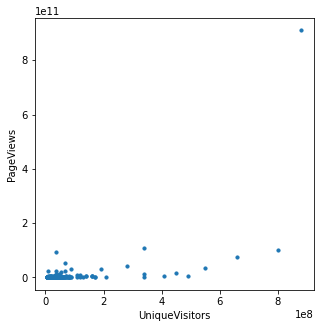

In [21]:
X = data['UniqueVisitors'].values
Y = data['PageViews'].values
print(X.shape, Y.shape)

# plt.figure(figsize=(8, 8))  # for a single figure
plt.rcParams["figure.figsize"] = (5, 5)  # for all figures below

plt.scatter(X, Y, s=10)
plt.xlabel('UniqueVisitors')
plt.ylabel('PageViews')

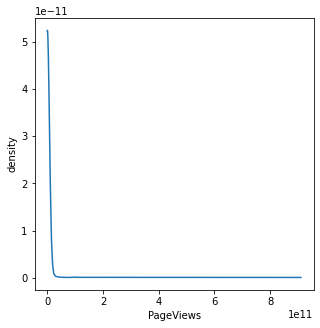

In [22]:
y = Y.copy()
y.sort()
density = st.gaussian_kde(y)
plt.plot(y, density(y))
plt.xlabel('PageViews')
plt.ylabel('density')
plt.show()

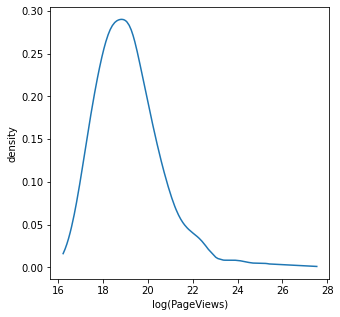

In [23]:
log_y = np.log(y)
density = st.gaussian_kde(log_y)
plt.plot(log_y, density(log_y))
plt.xlabel('log(PageViews)')
plt.ylabel('density')
plt.show()

Text(0, 0.5, 'log(PageViews)')

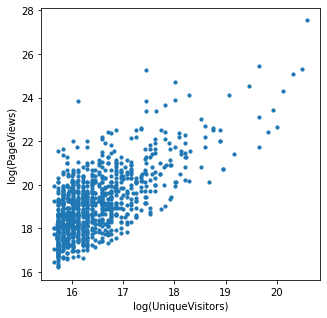

In [24]:
x = np.log(X)
y = np.log(Y)
plt.scatter(x, y, s=10)
plt.xlabel('log(UniqueVisitors)')
plt.ylabel('log(PageViews)')

MSE = 1.1720
RMSE = 1.0826
RSE = 1.084
R² = 0.4616
adjusted R² = 0.4611
y = 1.3363 x -2.8344


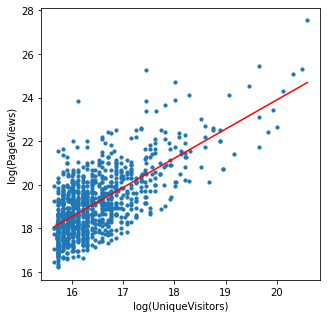

In [25]:
model = linear_model.LinearRegression()
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, c='red')
plt.xlabel('log(UniqueVisitors)')
plt.ylabel('log(PageViews)')

mse = metrics.mean_squared_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)
r2_adj = 1 - (1 - r2) * (1000 - 1) / (1000 - 2)
rss = mse * (1000)
rse = np.sqrt(rss / (1000 - 2))

print(f'MSE = {mse:.4f}')
print(f'RMSE = {np.sqrt(mse):.4f}')
print(f'RSE = {rse:.3f}')
print(f'R² = {r2:.4f}')
print(f'adjusted R² = {r2_adj:.4f}')

print(f'y = {model.coef_[0][0]:.4f} x {model.intercept_[0]:.4f}')

In [26]:
data = data.rename(columns={'UniqueVisitors': 'log(UniqueVisitors)'})
X = np.log(data['log(UniqueVisitors)'])
y = np.log(data['PageViews'])

X2 = sm.add_constant(X)
sm.OLS(y, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PageViews   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     855.6
Date:                Tue, 18 May 2021   Prob (F-statistic):          2.46e-136
Time:                        15:34:27   Log-Likelihood:                -1498.3
No. Observations:                1000   AIC:                             3001.
Df Residuals:                     998   BIC:                             3010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8344      0.752     -3.769      0.000      -4.310      -1.359
log(UniqueVisitors)     1.3363      0.046     29.251      0.000       1.247       1.426
==============================================================================
Omnibus:                       68.454   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.893
Skew:                           0.615   Prob(JB):                     2.23e-19
Kurtosis:                       3.742   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""